# Análisis de Señales y Sistemas.
# UTN FRM Ingeniería en Electrónica.

Al ejecutar la siguiente celda se importan las librerías necesarias para ejecutar este práctico. Se debe ejecutar cada vez que se abra el notebook ya que el entorno de variables se borra al cerrarlo.

In [191]:
# Make plots appear inline, set custom plotting style
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
OPATH='./img' # path de las img de salida
FIGSZ=10,5
DPI=300

# Espectros de una señal de senos

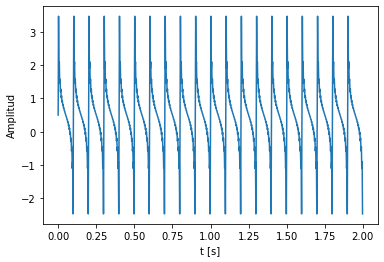

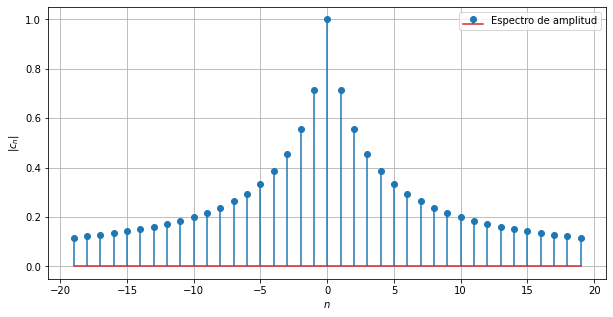

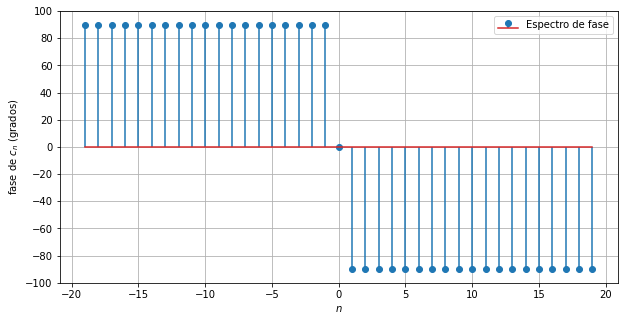

In [194]:
f = 10  # Frequency, in cycles per second, or Hertz
f_s = 400  # Sampling rate, or number of measurements per second
N_arm=20 # numero de armonicos
A_arm=np.array([1/(0.4*n+1) for n in range(N_arm)]) # amplitud de los armonicos

t = np.linspace(0, 2, 2 * f_s, endpoint=False)

x = A_arm[0]/2#/4
for arm in range(N_arm):
    x += A_arm[arm]*np.sin(arm * f * 2 * np.pi * t)
    
#for arm in range(N_arm):
#    x += A_arm[arm]*np.cos(arm * f * 2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, x)
ax.set_xlabel('t [s]')
ax.set_ylabel('Amplitud');

#spectrum
from scipy import fftpack

X = fftpack.fft(x) /(f_s)
freqs = fftpack.fftfreq(len(x)) * f_s / f

freqs= freqs[np.where(np.abs(X) > np.finfo(np.float32).eps)]
X=X[np.where(np.abs(X) > np.finfo(np.float32).eps)] # limpio errores numericos

fig, ax = plt.subplots(figsize=FIGSZ)
ax.stem(freqs, np.abs(X))#, use_line_collection=True)
ax.legend(['Espectro de amplitud'])
ax.set_ylabel('$|c_n|$')
ax.set_xlabel('$n$')
ax.grid()
plt.savefig(OPATH+'/tema7_0.jpg')

fig3,ax4 = plt.subplots(figsize=FIGSZ)
ax4.stem(freqs, np.angle(X,deg=False)*180/np.pi)#, use_line_collection=True)
ax4.legend(['Espectro de fase'])
ax4.set_ylabel('fase de $c_n$ (grados)')
ax4.set_yticks(range(-100, 120,20))
ax4.set_xlabel('$n$')
ax4.grid()
plt.savefig(OPATH+'/tema7_1.jpg')
